In [1]:
import pandas as pd
import dalecLoad
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [13]:
tables = dalecLoad.multiLogLoad('data/20-jun-22/Logs_20-Jun-22_20220623.dtf', dropNA=False)

In [3]:
# hacky way to get readings which are probably good...
# actually this doesn't work that well! 
Log1 = tables['Log 1'].drop(tables['Log 1'].loc[pd.to_numeric(tables['Log 1'][' Pitch']) <= 1.0].index)
Log2 = tables['Log 2'].drop(tables['Log 2'].loc[pd.to_numeric(tables['Log 2'][' Pitch']) <= 1.0].index)
Log1.index.get_level_values('Sample #')

Int64Index([ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
            ...
            66, 66, 66, 66, 66, 66, 66, 66, 66, 66],
           dtype='int64', name='Sample #', length=27600)

In [4]:
spect_wavelengths = dalecLoad.load_DALEC_spect_wavelengths('data/20-jun-22/Logs_20-Jun-22_20220623.dtf')
mean_bridge = dalecLoad.uniform_grid_spectra_mean(Log1, spect_wavelengths)
mean_bridge

,Wavelength,Lu_mean,Lsky_mean,Ed_mean
0,400.0,0.175150,2.450727,36.598582
1,401.0,0.179581,2.530244,37.984975
2,402.0,0.183799,2.569406,39.371368
3,403.0,0.188017,2.608568,40.411993
4,404.0,0.190553,2.647730,40.994276
...,...,...,...,...
596,996.0,0.007592,0.132892,20.460919
597,997.0,0.007571,0.131164,20.303823
598,998.0,0.007608,0.129485,20.146728
599,999.0,0.007738,0.132743,20.009134


In [ ]:
mean_jetty = dalecLoad.uniform_grid_spectra_mean(Log2, spect_wavelengths)

In [ ]:
# very simple Rrs calculation
RHO = 0.028
#Rrs_10 = (Lu_10[:, 1] - (RHO * Lsky_10[:, 1])) / Ed_10[:, 1]

mean_bridge['Rrs'] = (mean_bridge['Lu_mean'] - (RHO * mean_bridge['Lsky_mean'])) / mean_bridge['Ed_mean']
mean_jetty['Rrs'] = (mean_jetty['Lu_mean'] - (RHO * mean_jetty['Lsky_mean'])) / mean_jetty['Ed_mean']

fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(mean_bridge['Wavelength'], mean_bridge['Rrs'], label='Airthrey Bridge')
ax[1].plot(mean_jetty['Wavelength'], mean_jetty['Rrs'], label='Airthrey Jetty')
ax[0].legend()
ax[1].legend()

plt.show()

(0.0, 0.005)

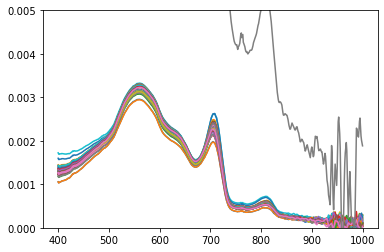

In [16]:
# this seems to be the nicest way to do it! 

for sample in tables['Log 1'].index.get_level_values('Sample #').unique():
    spectra = dalecLoad.uniform_grid_spectra_Rrs(tables['Log 1'].loc[sample],
                                       spect_wavelengths)
    plt.plot(spectra['Wavelength'], spectra['Rrs'])
plt.ylim(0, 0.005)

(0.0, 0.007)

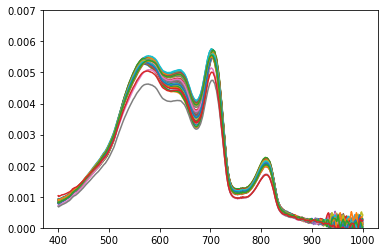

In [19]:
for sample in tables['Log 2'].index.get_level_values('Sample #').unique():
    spectra = dalecLoad.uniform_grid_spectra_Rrs(tables['Log 2'].loc[sample],
                                       spect_wavelengths)
    plt.plot(spectra['Wavelength'], spectra['Rrs'])
plt.ylim(0, 0.007)

In [12]:
Log2

spectral_ind      UTC Time  Solar Elev   UTC Date  Relaz  \
Sample #  Channel                                                             
53       Ed                  21  11:54:48.909        57.4 2022-06-20  135.8   
         Ed                  22  11:54:48.909        57.4 2022-06-20  135.8   
         Ed                  23  11:54:48.909        57.4 2022-06-20  135.8   
         Ed                  24  11:54:48.909        57.4 2022-06-20  135.8   
         Ed                  25  11:54:48.909        57.4 2022-06-20  135.8   
...                         ...           ...         ...        ...    ...   
54       Lu                 216  11:54:50.319        57.4 2022-06-20  146.9   
         Lu                 217  11:54:50.319        57.4 2022-06-20  146.9   
         Lu                 218  11:54:50.319        57.4 2022-06-20  146.9   
         Lu                 219  11:54:50.319        57.4 2022-06-20  146.9   
         Lu                 220  11:54:50.319        57.4 2022-06-20  146.9   

                      Temp         Lat   Saturation Flag  Solar Azi  Gearpos  \
Sample #  Channel                                                              
53       Ed        26.1875  56.1475906                 0      172.6     -0.2   
         Ed        26.1875  56.1475906                 0      172.6     -0.2   
         Ed        26.1875  56.1475906                 0      172.6     -0.2   
         Ed        26.1875  56.1475906                 0      172.6     -0.2   
         Ed        26.1875  56.1475906                 0      172.6     -0.2   
...                    ...         ...               ...        ...      ...   
54       Lu           25.5  56.1475639                 0      172.6     -0.3   
         Lu           25.5  56.1475639                 0      172.6     -0.3   
         Lu           25.5  56.1475639                 0      172.6     -0.3   
         Lu           25.5  56.1475639                 0      172.6     -0.3   
         Lu           25.5  56.1475639                 0      172.6     -0.3   

                   Heading  Voltage          Lon  Integration Time  Pitch  \
Sample #  Channel                                                           
53       Ed          308.4     11.4  -3.92372512               268   95.0   
         Ed          308.4     11.4  -3.92372512               268   95.0   
         Ed          308.4     11.4  -3.92372512               268   95.0   
         Ed          308.4     11.4  -3.92372512               268   95.0   
         Ed          308.4     11.4  -3.92372512               268   95.0   
...                    ...      ...          ...               ...    ...   
54       Lu          319.5     11.4  -3.92370986                21   99.0   
         Lu          319.5     11.4  -3.92370986                21   99.0   
         Lu          319.5     11.4  -3.92370986                21   99.0   
         Lu          319.5     11.4  -3.92370986                21   99.0   
         Lu          319.5     11.4  -3.92370986                21   99.0   

                    Roll  GPS_Fix  Spectral Magnitude  
Sample #  Channel                                      
53       Ed         -6.0        A            0.011107  
         Ed         -6.0        A            0.011309  
         Ed         -6.0        A            0.011056  
         Ed         -6.0        A            0.010576  
         Ed         -6.0        A            0.010476  
...                  ...      ...                 ...  
54       Lu        -19.0        A            0.003408  
         Lu        -19.0        A            0.004169  
         Lu        -19.0        A            0.005571  
         Lu        -19.0        A            0.003476  
         Lu        -19.0        A            0.004564  

[1200 rows x 18 columns]